# COGS 118B - Final Project

# Insert title here

## Group members
- Sreetama Chowdhury
- Lucy Lennemann
- Nikki Rejai
- Melvyn Tan

# Abstract 
The goal of this project is to address the genre categorization problem in the realm of music, utilizing clustering techniques on the Spotify 1.2M+ Songs dataset. With over 100,000 songs released daily, our objective is to categorize songs into distinct genres based on their audio features, hypothesizing that songs within the same genre share similarities in variables like tempo and danceability. The dataset, comprising 24 variables including danceability, tempo, and acousticness, is sourced from the Spotify API. We plan to implement both K-means and Gaussian Mixture Models, comparing their performance using evaluation metrics such as Rand Index and Adjusted Rand Index. Data cleaning involves handling null values, potential one-hot encoding, and standardization. To enhance the user experience on Spotify, personalized recommendations and playlists aligned with individual preferences will be generated based on the identified genres. Success will be measured by the accuracy of the clustering models, evaluated through the Rand Index metrics, providing insights into the effectiveness of our approach in capturing meaningful patterns within the music dataset.


# Background

With the ubiquitous influence of the internet on our daily lives, the wealth of available data continues to increase rapidly. This abundance of data has many benefits as organizations have the opportunity to use this data to optimize their user engagement by understanding user behavior and trends <a name="henke"></a>[<sup>[1]</sup>](#henkenote). Spotify, a leading music streaming platform, has an expansive repository of music-related data, offering insights into popularity of songs and/or artists, users’ music consumption patterns, trends, and song characteristics. The platform hosts an extensive breadth of songs spanning various genres, artists, and musical styles,  prompting an intriguing question: how can we effectively define and categorize this diverse musical library? 

Given the sheer amount of songs on the platform, there is immense potential in classifying and organizing them into categories, such as musical genres. By classifying the songs on their platform, Spotify can enhance their user experience by providing personalized song recommendations, and playlists, which aligns with individual preferences <a name="zhangjiang"></a>[<sup>[2]</sup>](#zhangjiangnote). Moreover, understanding different nuances and patterns within the dataset can offer valuable insights into user behavior, music trends, and emerging genres. 

Our research into classification techniques for large datasets led us to explore Gaussian Mixture Models (GMM) and K-means clustering as potential solutions. GMM is a probabilistic model that assumes that the data is generated from a mixture of several Gaussian distributions <a name="zhang"></a>[<sup>[3]</sup>](#zhangnote). It is well-suited for clustering tasks where the underlying data distribution is complex and may contain overlapping clusters. Additionally, K-means is a centroid-based clustering algorithm that partitions the data into K clusters by iteratively updating the cluster centroids to minimize the within-cluster variance<a name="kodinariya"></a>[<sup>[4]</sup>](#kodinariyanote). K-means clustering is a versatile and efficient algorithm that can be used for various clustering tasks, especially when the dataset is very large and the clusters are well-separated. 

In this project, we propose to use clustering techniques to group songs and determine song genres based on their audio features. We plan to employ both K-means and Gaussian Mixture Model (GMM) algorithms to explore the shape of the dataset and identify clusters representing different musical genres. By utilizing the scikit-learn library in Python, we aim to implement these models and evaluate their accuracy of classifying songs into meaningful genres. Our hypothesis is that clustering techniques, such as K-means and GMM, will be effective in identifying distinct clusters within the Spotify dataset that correspond to different musical genres. We anticipate that these models will provide valuable insights into the structure of the data and enable us to classify songs into genres with a high level of accuracy. Once we have classified the dataset into genres, our goal is to enhance the user experience on Spotify by providing personalized recommendations and curated playlists that cater to individual preferences and interests.

# Problem Statement

Music has always been one of the most popular forms of entertainment, as it can invoke feelings of relaxation and motivation. Because of its popularity, there are more than 100,000 songs released every day which presents a genre categorization problem. In this project, we aim to use clustering techniques with the Spotify 1.2M+ Songs dataset to categorize songs into distinct genres based on their features. We hypothesize that songs in the same genre, such as pop, will have similar values for variables such as tempo and danceability. We will try both K-Means and Gaussian Mixture Models, using metrics such as rand score and adjusted rand score to compare their results. 

# Data

Detail how/where you obtained the data and cleaned it (if necessary)

If the data cleaning process is very long (e.g., elaborate text processing) consider describing it briefly here in text, and moving the actual clearning process to another notebook in your repo (include a link here!).  The idea behind this approach: this is a report, and if you blow up the flow of the report to include a lot of code it makes it hard to read.

Please give the following infomration for each dataset you are using
- link/reference to obtain it
- description of the size of the dataset (# of variables, # of observations)
- what an observation consists of
- what some critical variables are, how they are represented
- any special handling, transformations, cleaning, etc you have done should be demonstrated here!


In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [2]:
#tracks_features = pd.read_csv('tracks_features.csv')

In [3]:
#tracks_features.shape

In [4]:
# data = tracks_features.sample(n=15000, random_state=42)
# data = data.reset_index(drop=True)
data = pd.read_csv('data.csv')

In [5]:
data.to_csv('data.csv', index=False)  

In [6]:
data = data.dropna()
data.shape

(15000, 24)

In [7]:
data.head()

id                                    name  \
0  1aGS6nf2xgv3Xzdob4eOO3                   Smokin' Sticky Sticky   
1  0fJfoqHIIiET2EcgjOfntG                  Holding Back the Years   
2  0V2R2LC8dR7S0REieXRaGt  All Along The Watchtower - Live - 1991   
3  4VUHYLocWOJ2GfvP78AmSs                               Windmills   
4  4m8a1AtmCnoeRzSYoQ0oX0                          Overnite Flite   

                    album                album_id           artists  \
0    Beat'n Down Yo Block  5ZO72kl3xMRRzlpod55k1Q           ['Unk']   
1  Holding Back The Years  7sV4kCqQYt8agM5TjkdOYU  ['Norm Douglas']   
2  Back On The Bus, Y'All  3jmmx4jRkul3POEhn1cgwF  ['Indigo Girls']   
3          Total Folklore  5PyLkzuxmT6EoVNZCg8Iya     ['Dan Friel']   
4   Normal Human Feelings  623VIdYR6Y0NCN9yPbMAC6   ['Little Suns']   

                   artist_ids  track_number  disc_number  explicit  \
0  ['0PGtMx1bsqoCHCy3MB3gXA']            15            1      True   
1  ['4kxKyoiYhldUlnfeCZtD0D']             1            1     False   
2  ['4wM29TDTr3HI0qFY3KoSFG']             7            1     False   
3  ['4HKTPJw50BFASrfhJEHIVP']             2            1     False   
4  ['5OLcAqMbHpecNOIQyTduQ7']             2            1     False   

   danceability  ...  speechiness  acousticness  instrumentalness  liveness  \
0         0.623  ...       0.4020      0.002100          0.000000    0.0691   
1         0.585  ...       0.0333      0.316000          0.775000    0.0993   
2         0.331  ...       0.0379      0.709000          0.000000    0.9390   
3         0.193  ...       0.1090      0.000049          0.838000    0.2850   
4         0.546  ...       0.0323      0.427000          0.000105    0.1970   

   valence    tempo  duration_ms  time_signature  year  release_date  
0    0.422   87.988       380427             4.0  2006    2006-10-03  
1    0.880  170.082       266520             4.0  2008    2008-06-13  
2    0.430   90.648       383773             4.0  1991    1991-06-04  
3    0.594  113.345        82493             4.0  2013    2013-02-19  
4    0.424  127.941       230667             1.0  2013    2013-10-08  

[5 rows x 24 columns]

In [8]:
data.dtypes

id                   object
name                 object
album                object
album_id             object
artists              object
artist_ids           object
track_number          int64
disc_number           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
duration_ms           int64
time_signature      float64
year                  int64
release_date         object
dtype: object

In [9]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                15000 non-null  object 
 1   name              15000 non-null  object 
 2   album             15000 non-null  object 
 3   album_id          15000 non-null  object 
 4   artists           15000 non-null  object 
 5   artist_ids        15000 non-null  object 
 6   track_number      15000 non-null  int64  
 7   disc_number       15000 non-null  int64  
 8   explicit          15000 non-null  bool   
 9   danceability      15000 non-null  float64
 10  energy            15000 non-null  float64
 11  key               15000 non-null  int64  
 12  loudness          15000 non-null  float64
 13  mode              15000 non-null  int64  
 14  speechiness       15000 non-null  float64
 15  acousticness      15000 non-null  float64
 16  instrumentalness  15000 non-null  float6

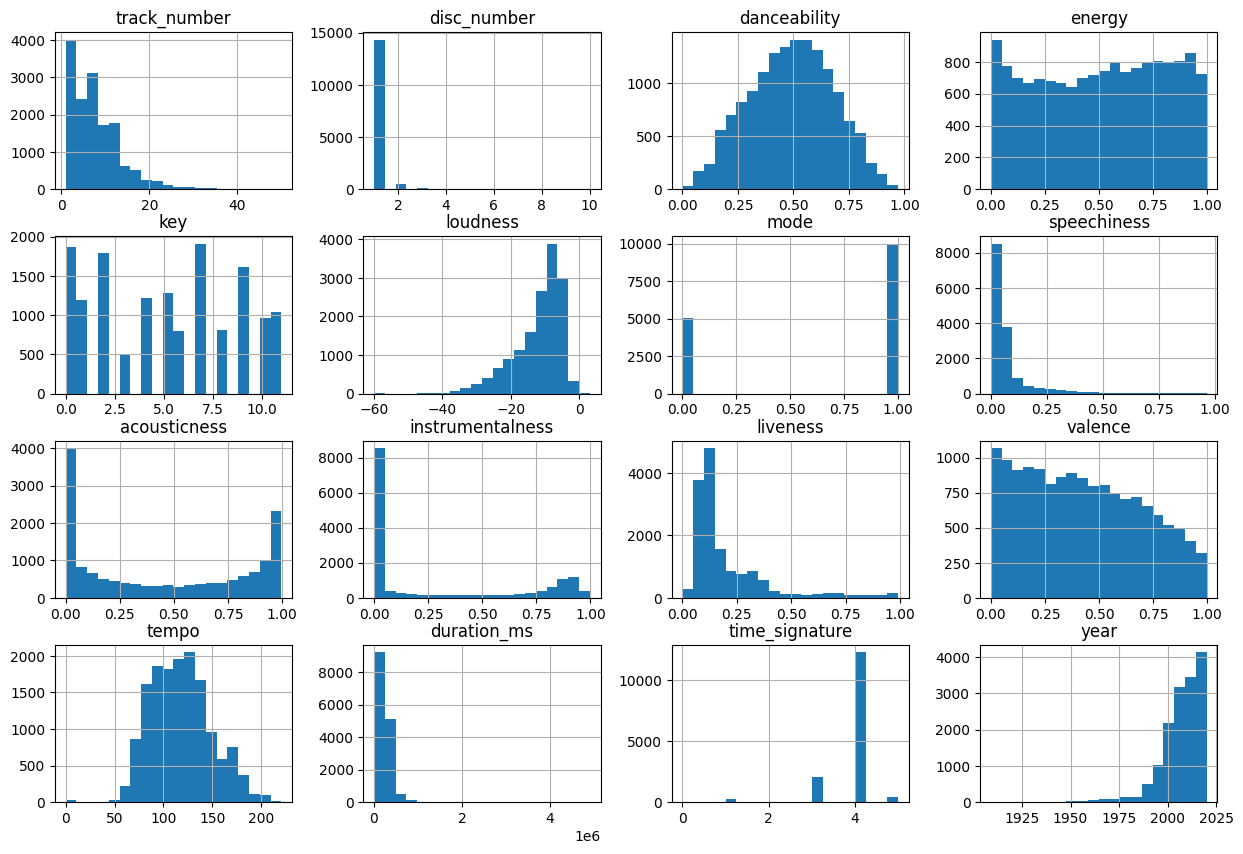

In [10]:
#visualizing distribution of numerical variables
data.hist(bins=20, figsize=(15, 10))
plt.show()

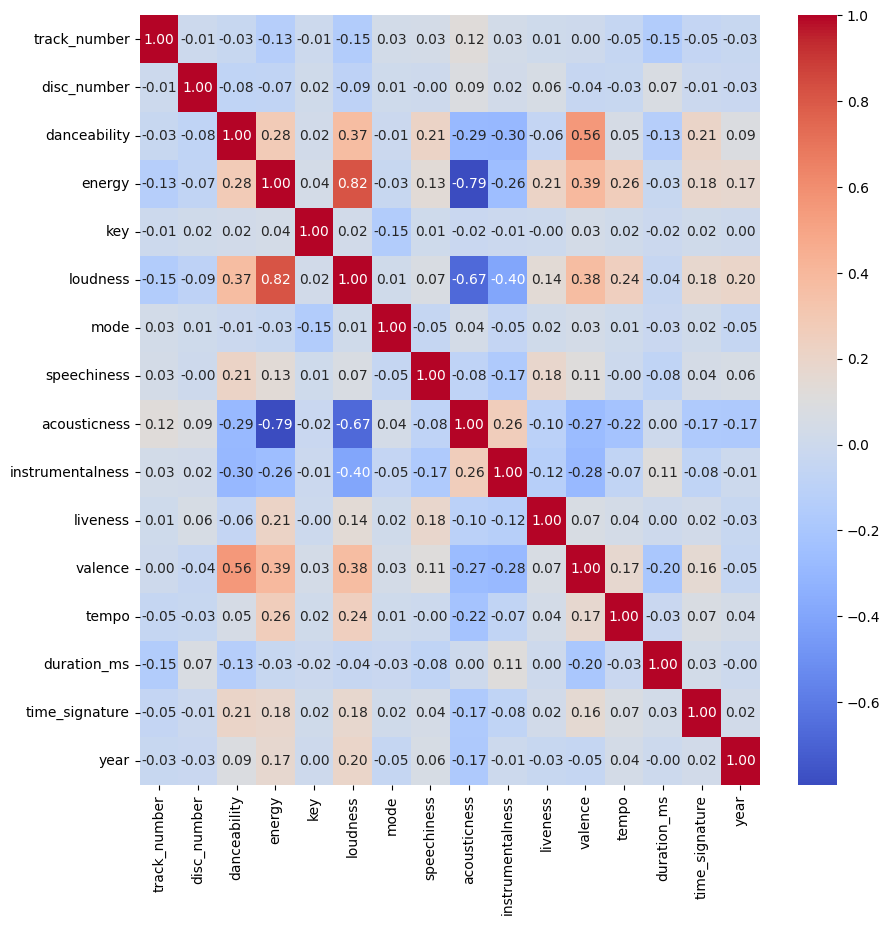

In [11]:
#correlation analysis of numeric variables
numeric_columns = data.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = data[numeric_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [12]:
# #preprocessing
# data = data.drop(columns=['id', 'year', 'release_date', 'artist_ids', 'album_id'])

# categorical_columns = ['album', 'artists']
# data = pd.get_dummies(data, columns=categorical_columns) #method of one-hot encoding

# data['explicit'] = data['explicit'].astype(int)

# numerical_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
#                       'liveness', 'valence', 'tempo', 'duration_ms']
# scaler = StandardScaler()
# data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

# data.head()

In [13]:
data.shape

(15000, 24)

# Data Visualization: PCA, T-SNE & UMAP
In order to perform PCA, T-SNE or UMAP, we will need to drop non-numerical columns and then scale the numerical columns.

In [14]:
# Drop non-numerical or non-ordinal columns
data = data.drop(columns=['name', 'album', 'artists', 'id', 'year', 'release_date', 'artist_ids', 'album_id'])

# Change explicit to be integer type
data['explicit'] = data['explicit'].astype(int)

# Scale the numerical columns
numerical_columns = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
                      'liveness', 'valence', 'tempo', 'duration_ms']

scaler = StandardScaler()
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

## PCA
Steps that we will take:
1. We will fit the PCA transformation to our scaled dataset. We will set n_components as "mle" that will estimate the best number of components to keep.
2. Plot a Scree plot to help us understand the optimal number of prinicipal components to keep. We will use the elbow method to choose the number of components that capture the most variance before it reaches the point of dominishing returns. We will eyeball the best value from the graph.
3. We will plot a cumulative variance plot to visualize the total variance as we include more components.
4. We will print the components of each PC value and interpret the results.

### Step 1: Fit PCA

In [15]:
# Step 1: Perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components='mle', svd_solver='full')
# Fit the PCA transformation
pca.fit(data[numerical_columns])
# Transform data
data_pca = pca.transform(data[numerical_columns])

### Step 2: Plot Scree

Explained Variance Ratio: [0.33571656 0.13453561 0.11463454 0.09486981 0.08479915 0.07733143
 0.0747253  0.04090475 0.03077188]


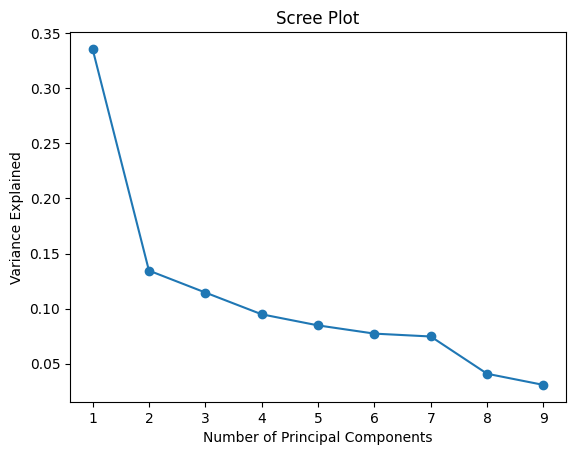

In [16]:
# Step 2: Examine the Output
# Check the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio:", explained_variance_ratio)

# Plot the scree plot
plt.figure()
plt.plot(range(1, len(explained_variance_ratio) + 1), explained_variance_ratio, marker='o')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Variance Explained')
plt.show()

### Step 3: Plot Cumulative Variance

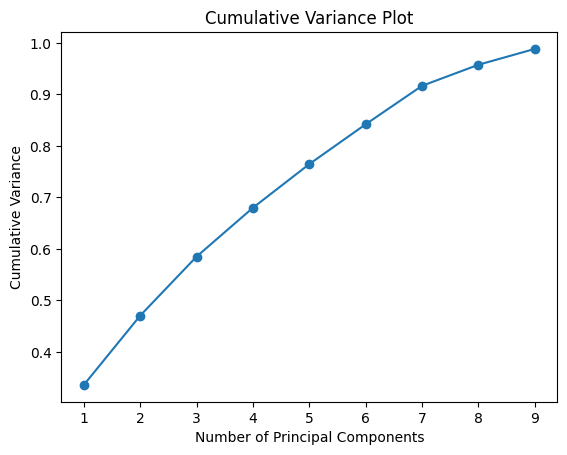

In [17]:
# Step 3: Cumulative variance plot
plt.figure()
plt.plot(range(1, len(explained_variance_ratio) + 1), 
         np.cumsum(explained_variance_ratio), marker='o')
plt.title('Cumulative Variance Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance')
plt.show()

### Step 4: Value of PC Components

In [18]:
# Step 4: Interpret the Results
# Check the component loadings (weights)
loadings = pca.components_
# We can create a DataFrame for easier interpretation
loadings_df = pd.DataFrame(loadings.T, columns=['PC{}'.format(i+1) for i in range(loadings.shape[0])], index=numerical_columns)
print(loadings_df)

                       PC1       PC2       PC3       PC4       PC5       PC6  \
danceability     -0.317407 -0.453700 -0.196160  0.264126  0.228088  0.022590   
energy           -0.472915  0.288258  0.023917  0.014448 -0.108871 -0.224544   
loudness         -0.470282  0.198345 -0.053436  0.082209 -0.152175 -0.020269   
speechiness      -0.131948 -0.323945  0.572971  0.061180  0.453769 -0.477706   
acousticness      0.429650 -0.304565  0.050418 -0.099258  0.126162  0.278090   
instrumentalness  0.283963  0.238955 -0.154506 -0.133142  0.196770 -0.602086   
liveness         -0.119124  0.123816  0.722424 -0.256354 -0.134478  0.314759   
valence          -0.342361 -0.367753 -0.189552 -0.045626  0.148340  0.209022   
tempo            -0.183871  0.232230 -0.195995 -0.657618  0.587540  0.198496   
duration_ms       0.081137  0.460890  0.084517  0.625849  0.516848  0.313767   

                       PC7       PC8       PC9  
danceability      0.232172  0.676704  0.006086  
energy            0.0

### Re-Visualizing the Data

In [19]:
import plotly.graph_objs as go

# Extract the first 3 PCA components
x = data_pca[:, 0]  # PC1
y = data_pca[:, 1]  # PC2
z = data_pca[:, 2]  # PC3

# Create a 3D scatter plot
trace = go.Scatter3d(
    x=x,
    y=y,
    z=z,
    mode='markers',
    marker=dict(
        size=5,
        opacity=0.5
    )
)

# Layout for the plot
layout = go.Layout(
    title='3D PCA Plot',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3'),
    ),
    margin=dict(r=0, b=0, l=0, t=0)
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Render the plot
fig.show()


## T-SNE & UMAP
We will now apply T-SNE and UMAP on data that has been dimensionally reduced using PCA. We have decided to do this because T-SNE and UMAP is computationally expensive and will take a long time to compute on a large dataset like ours. We want the PCA to serve as a noise reduction technique to capture most of the variance. As a result, this would improve the performance of T-SNE and UMAP since there is less noise. Although we initially visualized the first 3 principal components for simplicity, we will use all 9 prinicipal components from PCA for T-SNE and UMAP to retain more of the dataset's variance. We will now perform T-SNE and UMAP on the PCA-reduced data and discuss the findings.

### T-SNE

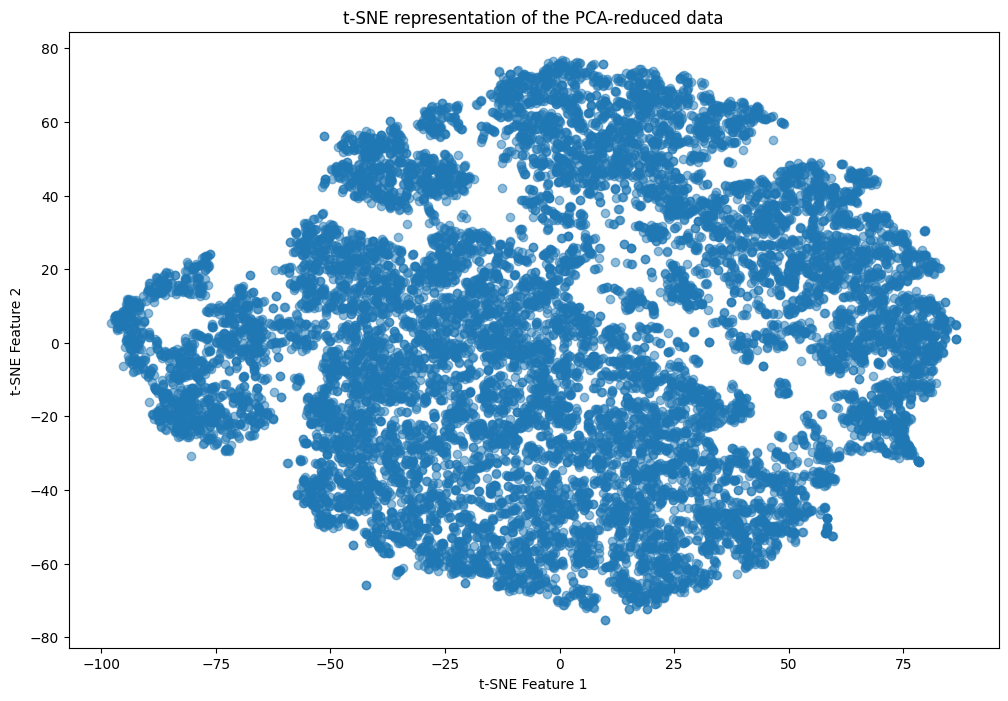

In [20]:
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Apply t-SNE to the PCA-reduced data
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000, random_state=42)
# Using 9 PCA components
data_tsne = tsne.fit_transform(data_pca)

# Now let's plot the result of the t-SNE reduction
plt.figure(figsize=(12, 8))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1], alpha=0.5)

plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE representation of the PCA-reduced data')

plt.show()


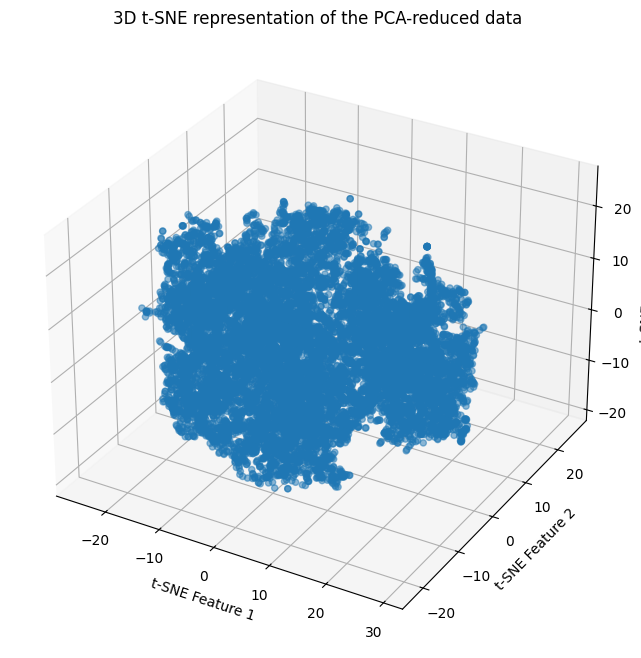

In [21]:
from mpl_toolkits.mplot3d import Axes3D

# Apply t-SNE to the PCA-reduced data to get a 3D embedding
tsne = TSNE(n_components=3, perplexity=30, n_iter=1000, random_state=42)
data_tsne_3d = tsne.fit_transform(data_pca)

# Now let's plot the result of the t-SNE reduction in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data_tsne_3d[:, 0], data_tsne_3d[:, 1], data_tsne_3d[:, 2], alpha=0.5)

ax.set_xlabel('t-SNE Feature 1')
ax.set_ylabel('t-SNE Feature 2')
ax.set_zlabel('t-SNE Feature 3')
ax.set_title('3D t-SNE representation of the PCA-reduced data')

plt.show()


Let's try plotting T-SNE with different values of perplexity. TODO  

## UMAP

Let's try plotting the UMP with different values of n_neighbors and min_dist.  
n_neighbors = 10  
min_dist = 0.1

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



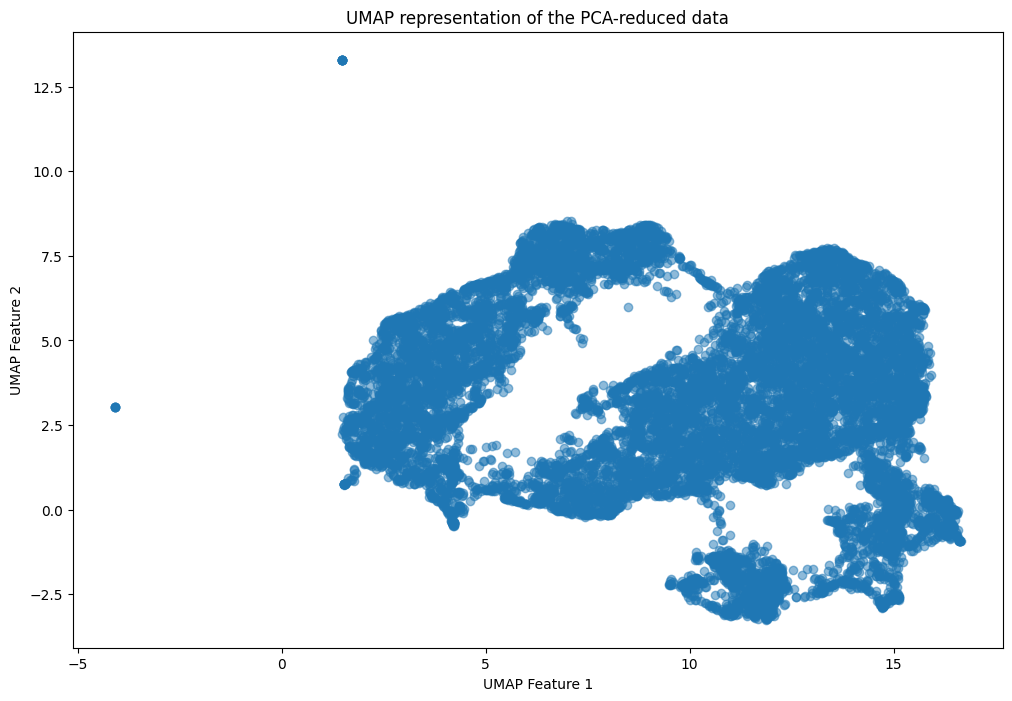

In [24]:
import matplotlib.pyplot as plt
import umap
import umap.umap_ as umap

# Apply UMAP to the PCA-reduced data
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.1, n_components=2, random_state=42)
data_umap = umap_model.fit_transform(data_pca)

# Plot the result of the UMAP reduction
plt.figure(figsize=(12, 8))
plt.scatter(data_umap[:, 0], data_umap[:, 1], alpha=0.5)

plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.title('UMAP representation of the PCA-reduced data')

plt.show()

Now, let's try plotting the UMP with different values of min_dist value.

c:\Python311\Lib\site-packages\umap\umap_.py:1943: UserWarning:

n_jobs value -1 overridden to 1 by setting random_state. Use no seed for parallelism.



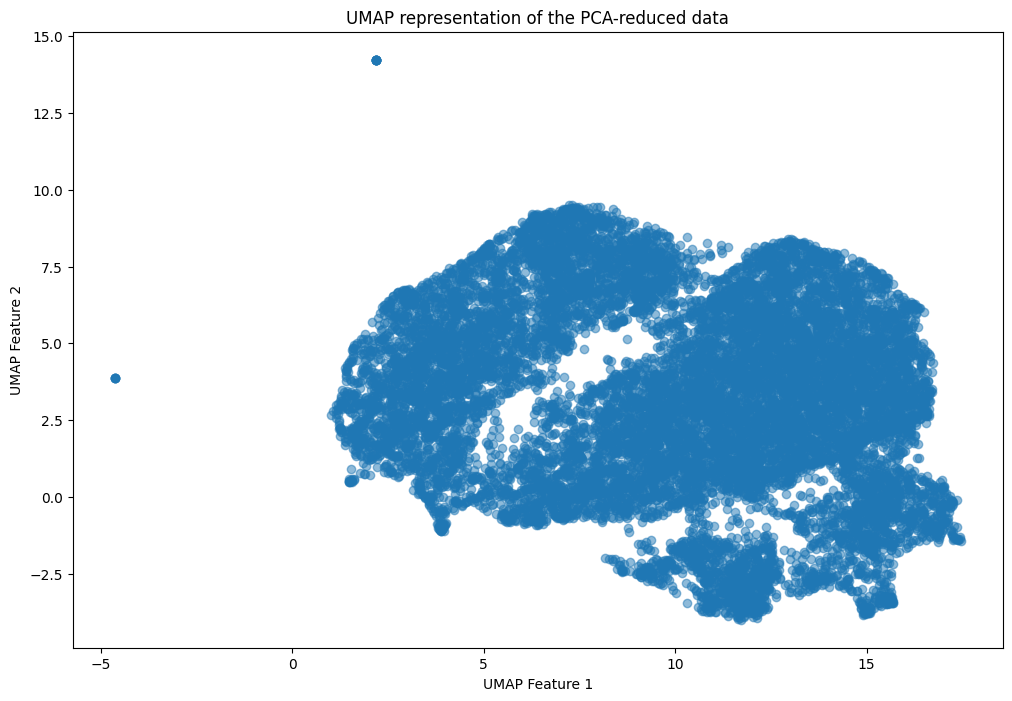

In [25]:
# Apply UMAP to the PCA-reduced data
umap_model = umap.UMAP(n_neighbors=10, min_dist=0.3, n_components=2, random_state=42)
data_umap = umap_model.fit_transform(data_pca)

# Plot the result of the UMAP reduction
plt.figure(figsize=(12, 8))
plt.scatter(data_umap[:, 0], data_umap[:, 1], alpha=0.5)

plt.xlabel('UMAP Feature 1')
plt.ylabel('UMAP Feature 2')
plt.title('UMAP representation of the PCA-reduced data')

plt.show()

Now, let's try plotting the UMP with a different n_neighbors value of 0.3. TODO

# Clustering Methods
## K-Means Clustering
An example of applying K-Means Clustering on the PCA-reduced data.

In [ ]:
from sklearn.cluster import KMeans
import plotly.graph_objs as go

# Apply K-Means clustering to the PCA-reduced data
kmeans = KMeans(n_clusters=5) 
cluster_labels = kmeans.fit_predict(data_pca[:, :3])  # Using only the first 3 components

# Create a 3D scatter plot with the cluster labels
trace = go.Scatter3d(
    x=data_pca[:, 0],
    y=data_pca[:, 1],
    z=data_pca[:, 2],
    mode='markers',
    marker=dict(
        size=5,
        color=cluster_labels,  # Set marker color to the cluster labels for differentiation
        opacity=0.8,
        colorscale='Viridis'  # Color scale for differentiation of clusters
    )
)

# Layout for the plot
layout = go.Layout(
    title='3D PCA Plot with Clusters',
    scene=dict(
        xaxis=dict(title='PC1'),
        yaxis=dict(title='PC2'),
        zaxis=dict(title='PC3'),
    ),
    margin=dict(r=0, b=0, l=0, t=0)
)

# Create the figure
fig = go.Figure(data=[trace], layout=layout)

# Render the plot
fig.show()


# Evaluation Metrics

Propose at least one evaluation metric that can be used to quantify the performance of both the benchmark model and the solution model. The evaluation metric(s) you propose should be appropriate given the context of the data, the problem statement, and the intended solution. Describe how the evaluation metric(s) are derived and provide an example of their mathematical representations (if applicable). Complex evaluation metrics should be clearly defined and quantifiable (can be expressed in mathematical or logical terms).

# Proposed Solution

In this section, clearly describe a solution to the problem. The solution should be applicable to the project domain and appropriate for the dataset(s) or input(s) given. Provide enough detail (e.g., algorithmic description and/or theoretical properties) to convince us that your solution is applicable. Make sure to describe how the solution will be tested.  

If you know details already, describe how (e.g., library used, function calls) you plan to implement the solution in a way that is reproducible.

If it is appropriate to the problem statement, describe a benchmark model<a name="sota"></a>[<sup>[3]</sup>](#sotanote) against which your solution will be compared. 

# Results

You may have done tons of work on this. Not all of it belongs here. 

Reports should have a __narrative__. Once you've looked through all your results over the quarter, decide on one main point and 2-4 secondary points you want us to understand. Include the detailed code and analysis results of those points only; you should spend more time/code/plots on your main point than the others.

If you went down any blind alleys that you later decided to not pursue, please don't abuse the TAs time by throwing in 81 lines of code and 4 plots related to something you actually abandoned.  Consider deleting things that are not important to your narrative.  If its slightly relevant to the narrative or you just want us to know you tried something, you could keep it in by summarizing the result in this report in a sentence or two, moving the actual analysis to another file in your repo, and providing us a link to that file.

### Subsection 1

You will likely have different subsections as you go through your report. For instance you might start with an analysis of the dataset/problem and from there you might be able to draw out the kinds of algorithms that are / aren't appropriate to tackle the solution.  Or something else completely if this isn't the way your project works.

### Subsection 2

Another likely section is if you are doing any feature selection through cross-validation or hand-design/validation of features/transformations of the data

### Subsection 3

Probably you need to describe the base model and demonstrate its performance.  Maybe you include a learning curve to show whether you have enough data to do train/validate/test split or have to go to k-folds or LOOCV or ???

### Subsection 4

Perhaps some exploration of the model selection (hyper-parameters) or algorithm selection task. Validation curves, plots showing the variability of perfromance across folds of the cross-validation, etc. If you're doing one, the outcome of the null hypothesis test or parsimony principle check to show how you are selecting the best model.

### Subsection 5 

Maybe you do model selection again, but using a different kind of metric than before?



# Discussion

### Interpreting the result

OK, you've given us quite a bit of tech informaiton above, now its time to tell us what to pay attention to in all that.  Think clearly about your results, decide on one main point and 2-4 secondary points you want us to understand. Highlight HOW your results support those points.  You probably want 2-5 sentences per point.

### Limitations

Are there any problems with the work?  For instance would more data change the nature of the problem? Would it be good to explore more hyperparams than you had time for?   

### Ethics & Privacy

If your project has obvious potential concerns with ethics or data privacy discuss that here.  Almost every ML project put into production can have ethical implications if you use your imagination. Use your imagination.

Even if you can't come up with an obvious ethical concern that should be addressed, you should know that a large number of ML projects that go into producation have unintended consequences and ethical problems once in production. How will your team address these issues?

Consider a tool to help you address the potential issues such as https://deon.drivendata.org

### Conclusion

Reiterate your main point and in just a few sentences tell us how your results support it. Mention how this work would fit in the background/context of other work in this field if you can. Suggest directions for future work if you want to.

# Footnotes
<a name="lorenznote"></a>1.[^](#lorenz): Lorenz, T. (9 Dec 2021) Birds Aren’t Real, or Are They? Inside a Gen Z Conspiracy Theory. *The New York Times*. https://www.nytimes.com/2021/12/09/technology/birds-arent-real-gen-z-misinformation.html<br> 
<a name="admonishnote"></a>2.[^](#admonish): Also refs should be important to the background, not some randomly chosen vaguely related stuff. Include a web link if possible in refs as above.<br>
<a name="sotanote"></a>3.[^](#sota): Perhaps the current state of the art solution such as you see on [Papers with code](https://paperswithcode.com/sota). Or maybe not SOTA, but rather a standard textbook/Kaggle solution to this kind of problem
